# Title Slide
# Predicting Household Energy Usage
Hunter Adrian

Brown University

October 23, 2024

Github link: https://github.com/huntera-1/Data1030-Final-Project

# Intro slide



### Problem Statement
- **Goal:** The goal is to predict the energy consumption of household appliances based on factors such as temperature, humidity, and weather data.
- **Type:** Regression.

### Data Source

- **Main Data:** 4.5 months of household energy and environment data.
- **Extra Data:** Weather data from Chievres Airport.

### Data Collection

- **Sensors:** ZigBee network tracks temperature and humidity (averaged every 10 minutes).
- **Energy Logs:** m-bus meters record appliance energy use every 10 minutes.
- **Weather:** Hourly weather data merged with house data.


# EDA slides

Show us what you think were the most interesting, unexpected, or important insights that you gained during EDA. Present at least three different informative visualization types. Do not create only three figures. Create as many figures you can to better understand your dataset and calculate summary statistics as well. Then select three figures that you want to show during the presentation. Explain why you chose the figures! Why are they interesting, unexpected, important?

# Exploratory Data Analysis Overview

The goal of EDA is to understand how environmental factors like temperature, humidity, and time affect appliance energy consumption. By exploring patterns and relationships in the data, we can identify the most important predictors for our regression model.


[Insert Correlation Heatmap or Summary Statistics Table Here]
If you want to highlight key data points like average energy use, temperature, or correlation between features.

# Splitting and preprocessing slides
Describe briefly how you split the data and why. What preprocessors did you use and why? How many features and data points do you have before and after preprocessing. If you have missing values, describe the basic properties of the missing values (e.g., what fraction of the points have missing values, which features, what fraction of the features are missing, etc).

# EDA

### Import Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

### Load Data and add Features
split date into more digestible columns

In [103]:
df = pd.read_csv("data/energy_data.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


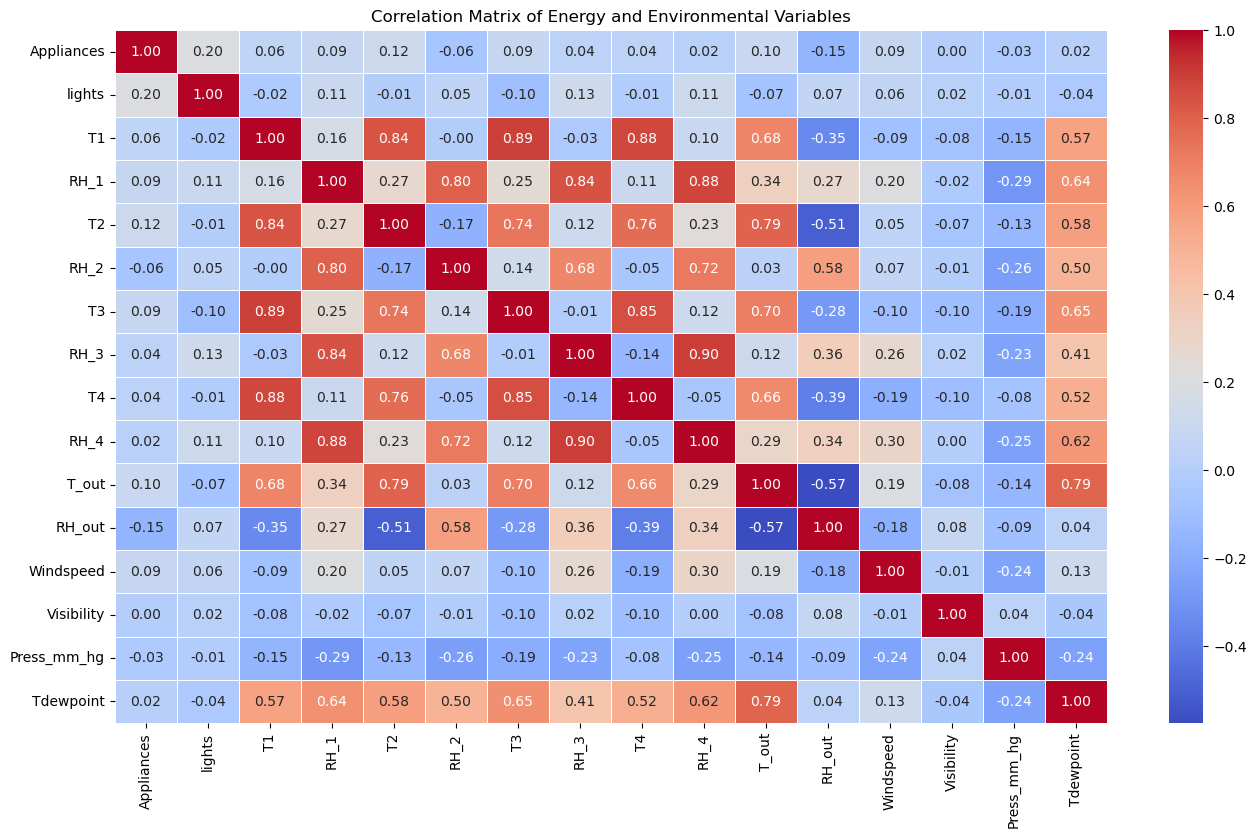

In [104]:


relevant_columns = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 
                    'T4', 'RH_4', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Press_mm_hg', 'Tdewpoint']

correlation_matrix = df[relevant_columns].corr()


plt.figure(figsize=(16, 9))

# Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix of Energy and Environmental Variables')

# Show the plot
plt.show()


# EDA VISUALS

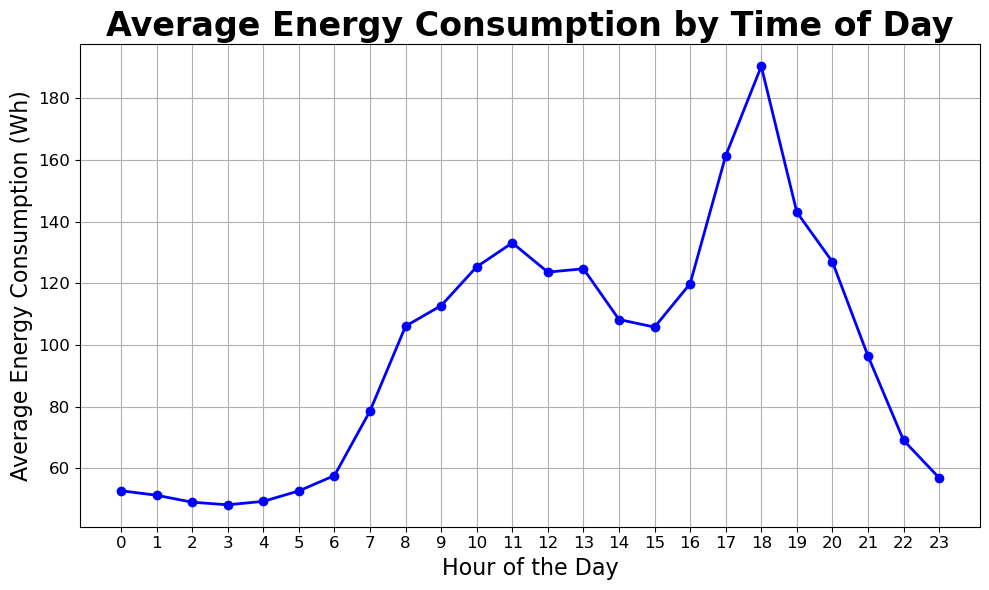

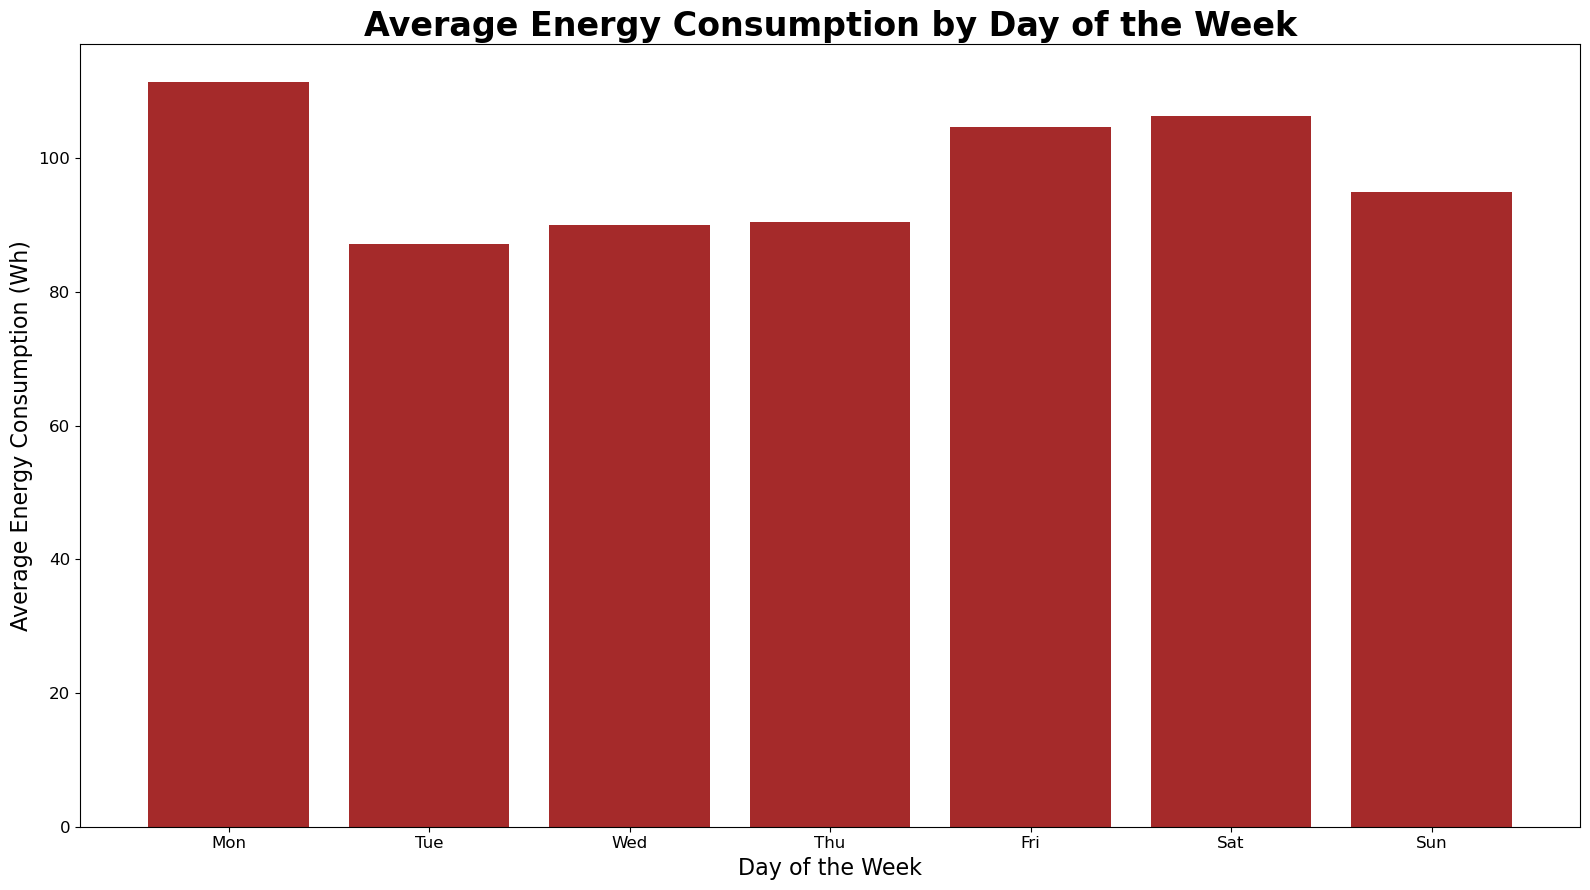

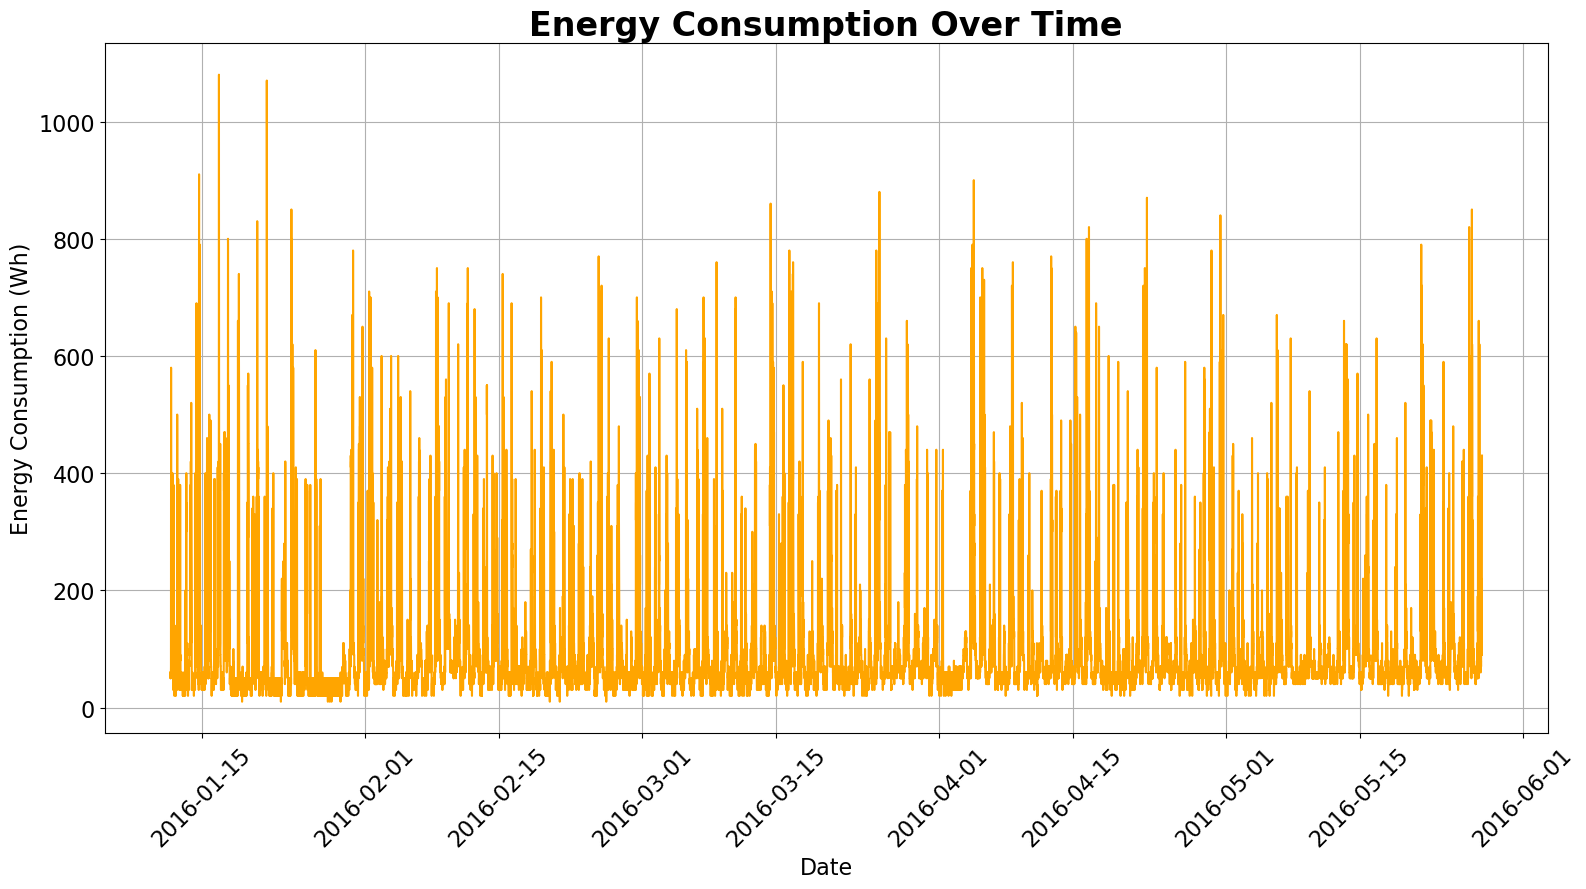

In [105]:
hourly_data = df.groupby(df.index.hour)['Appliances'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_data, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)

plt.title("Average Energy Consumption by Time of Day", fontsize=24, weight='bold')
plt.xlabel("Hour of the Day", fontsize=16)
plt.ylabel("Average Energy Consumption (Wh)", fontsize=16)
plt.grid(True)
plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()






daily_data = df.groupby(df.index.dayofweek)['Appliances'].mean()

plt.figure(figsize=(16, 9))
plt.bar(daily_data.index, daily_data.values, color='brown')

plt.title("Average Energy Consumption by Day of the Week", fontsize=24, weight='bold')
plt.xlabel("Day of the Week", fontsize=16)
plt.ylabel("Average Energy Consumption (Wh)", fontsize=16)
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 9))
plt.plot(df.index, df['Appliances'], color='orange')

plt.title("Energy Consumption Over Time", fontsize=24, weight='bold')
plt.xlabel("Date", fontsize=16)
plt.ylabel("Energy Consumption (Wh)", fontsize=16)

plt.grid(True)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()


# 3 Visuals

In [106]:
import os

# Create the directory if it doesn't exist
output_dir = 'eda_data'
os.makedirs(output_dir, exist_ok=True)

# Plot 1: Average Energy Consumption by Time of Day
hourly_data = df.groupby(df.index.hour)['Appliances'].mean()
plt.figure(figsize=(16, 9)) 
plt.plot(hourly_data, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)
plt.title("Average Energy Consumption by Time of Day", fontsize=24, weight='bold')
plt.xlabel("Hour of the Day", fontsize=18) 
plt.ylabel("Average Energy Consumption (Wh)", fontsize=18)
plt.grid(True)
plt.xticks(range(0, 24, 2), [f"{hour % 12 or 12} {'AM' if hour < 12 else 'PM'}" for hour in range(0, 24, 2)], fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "average_energy_consumption_by_time_of_day.png"))
plt.close()

# Plot 2: Correlation Matrix of Features
plt.figure(figsize=(16, 9))
sns.heatmap(df.drop(columns=['rv1', 'rv2']).corr(), cmap="coolwarm", linewidths=0.5, linecolor='black')
plt.title("Correlation Matrix of Features", fontsize=24, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "correlation_matrix_of_features.png"))
plt.close()

# Plot 3: Distribution of Energy Consumption (Appliances)
plt.figure(figsize=(16, 9)) 
plt.hist(df['Appliances'], bins=50, color='blue', edgecolor='black')
plt.title("Distribution of Energy Consumption (Appliances)", fontsize=24, weight='bold')
plt.xlabel("Energy Consumption (Wh)", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "distribution_of_energy_consumption.png"))
plt.close()


# EDA

### Feature Variable Descriptions

- **date**: date time year-month-day hour:minute:second 
- **Lights**: energy use of light fixtures in the house in Wh
- **T1**: Temperature in kitchen area, in Celsius
- **RH_1**: Humidity in kitchen area, in %
- **T2**: Temperature in living room area, in Celsius
- **RH_2**: Humidity in living room area, in %
- **T3**: Temperature in laundry room area, in Celsius
- **RH_3**: Humidity in laundry room area, in %
- **T4**: Temperature in office room, in Celsius
- **RH_4**: Humidity in office room, in %
- **T5**: Temperature in bathroom, in Celsius
- **RH_5**: Humidity in bathroom, in %
- **T6**: Temperature outside the building (north side), in Celsius
- **RH_6**: Humidity outside the building (north side), in %
- **T7**: Temperature in ironing room, in Celsius
- **RH_7**: Humidity in ironing room, in %
- **T8**: Temperature in teenager room 2, in Celsius
- **RH_8**: Humidity in teenager room 2, in %
- **T9**: Temperature in parents room, in Celsius
- **RH_9**: Humidity in parents room, in %
- **T_out**: Temperature outside (from Chievres weather station), in Celsius
- **Pressure**: (from Chievres weather station), in mm Hg
- **RH_out**: Humidity outside (from Chievres weather station), in %
- **Wind speed**: (from Chievres weather station), in m/s
- **Visibility**: (from Chievres weather station), in km
- **Tdewpoint**: (from Chievres weather station), in °C
- **rv1**: Random variable 1, nondimensional
- **rv2**: Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

Target Variable Description
- **Appliances**: energy use in Wh

In [107]:
rows, cols = df.shape
print("rows:", rows)
print("cols:", cols)

rows: 19735
cols: 28


In [108]:
print("Any null values:", df.isnull().values.any())
print("Any duplicates:", df.duplicated().any())



Any null values: False
Any duplicates: False


In [109]:
df.dtypes

Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [110]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


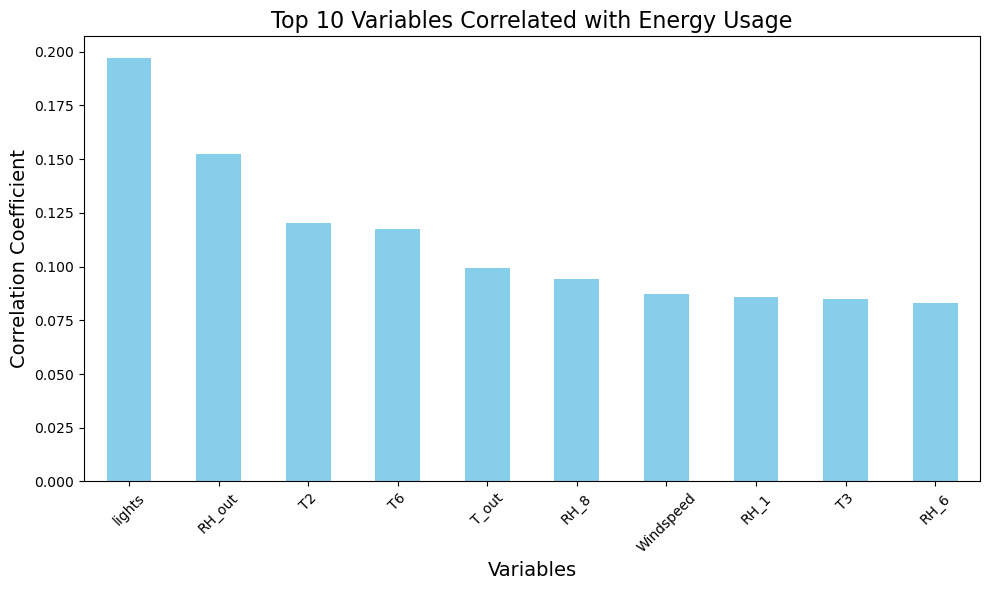

In [111]:
# Calculate the correlation of all variables with the target variable 'Appliances'
correlation_matrix = df.corr()
strongest_correlation = correlation_matrix['Appliances'].abs().sort_values(ascending=False)

# Visualize the strongest correlations using a bar plot
plt.figure(figsize=(10, 6))
strongest_correlation[1:11].plot(kind='bar', color='skyblue')
plt.title('Top 10 Variables Correlated with Energy Usage', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Correlation between Current and Lagged Appliances Usage:
            Appliances_Lag_10min  Appliances_Lag_30min  Appliances_Lag_1hour
Appliances              0.753166              0.437789              0.323661


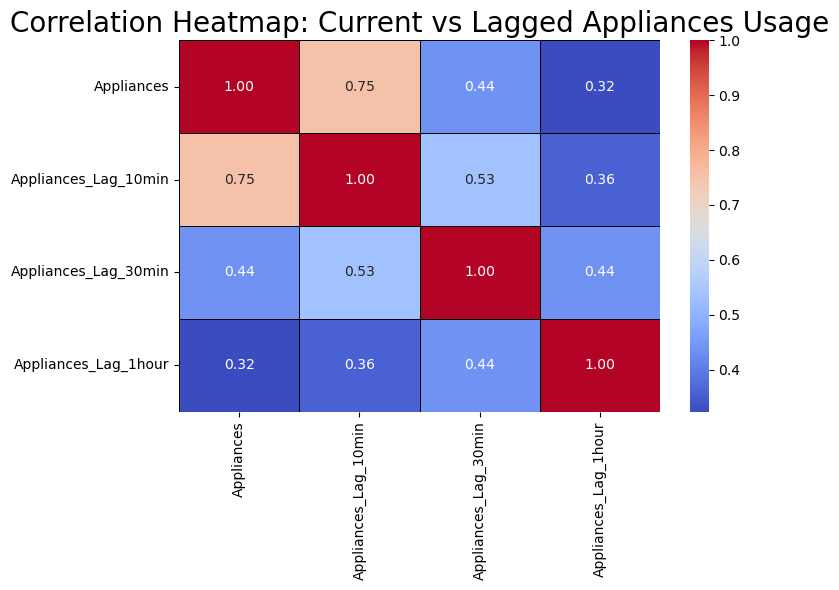

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances_Lag_10min,Appliances_Lag_30min,Appliances_Lag_1hour
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,NaN,NaN,NaN
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,60.0,NaN,NaN
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,60.0,NaN,NaN
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,50.0,60.0,NaN
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,50.0,60.0,NaN


In [112]:
# in[27]: ### Improved Lag Variable Visualization
# Create lag variables for 'Appliances' at 10 minutes, 30 minutes, and 1 hour
df['Appliances_Lag_10min'] = df['Appliances'].shift(1)  # 10 minutes lag
df['Appliances_Lag_30min'] = df['Appliances'].shift(3)  # 30 minutes lag
df['Appliances_Lag_1hour'] = df['Appliances'].shift(6)  # 1 hour lag

correlation = df[['Appliances', 'Appliances_Lag_10min', 'Appliances_Lag_30min', 'Appliances_Lag_1hour']].corr()

# Print the correlation values
print("Correlation between Current and Lagged Appliances Usage:")
print(correlation.loc[['Appliances'], ['Appliances_Lag_10min', 'Appliances_Lag_30min', 'Appliances_Lag_1hour']])

# Visualize the correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap: Current vs Lagged Appliances Usage', fontsize=20)
plt.tight_layout()
plt.show()
df.head()

# Split Data

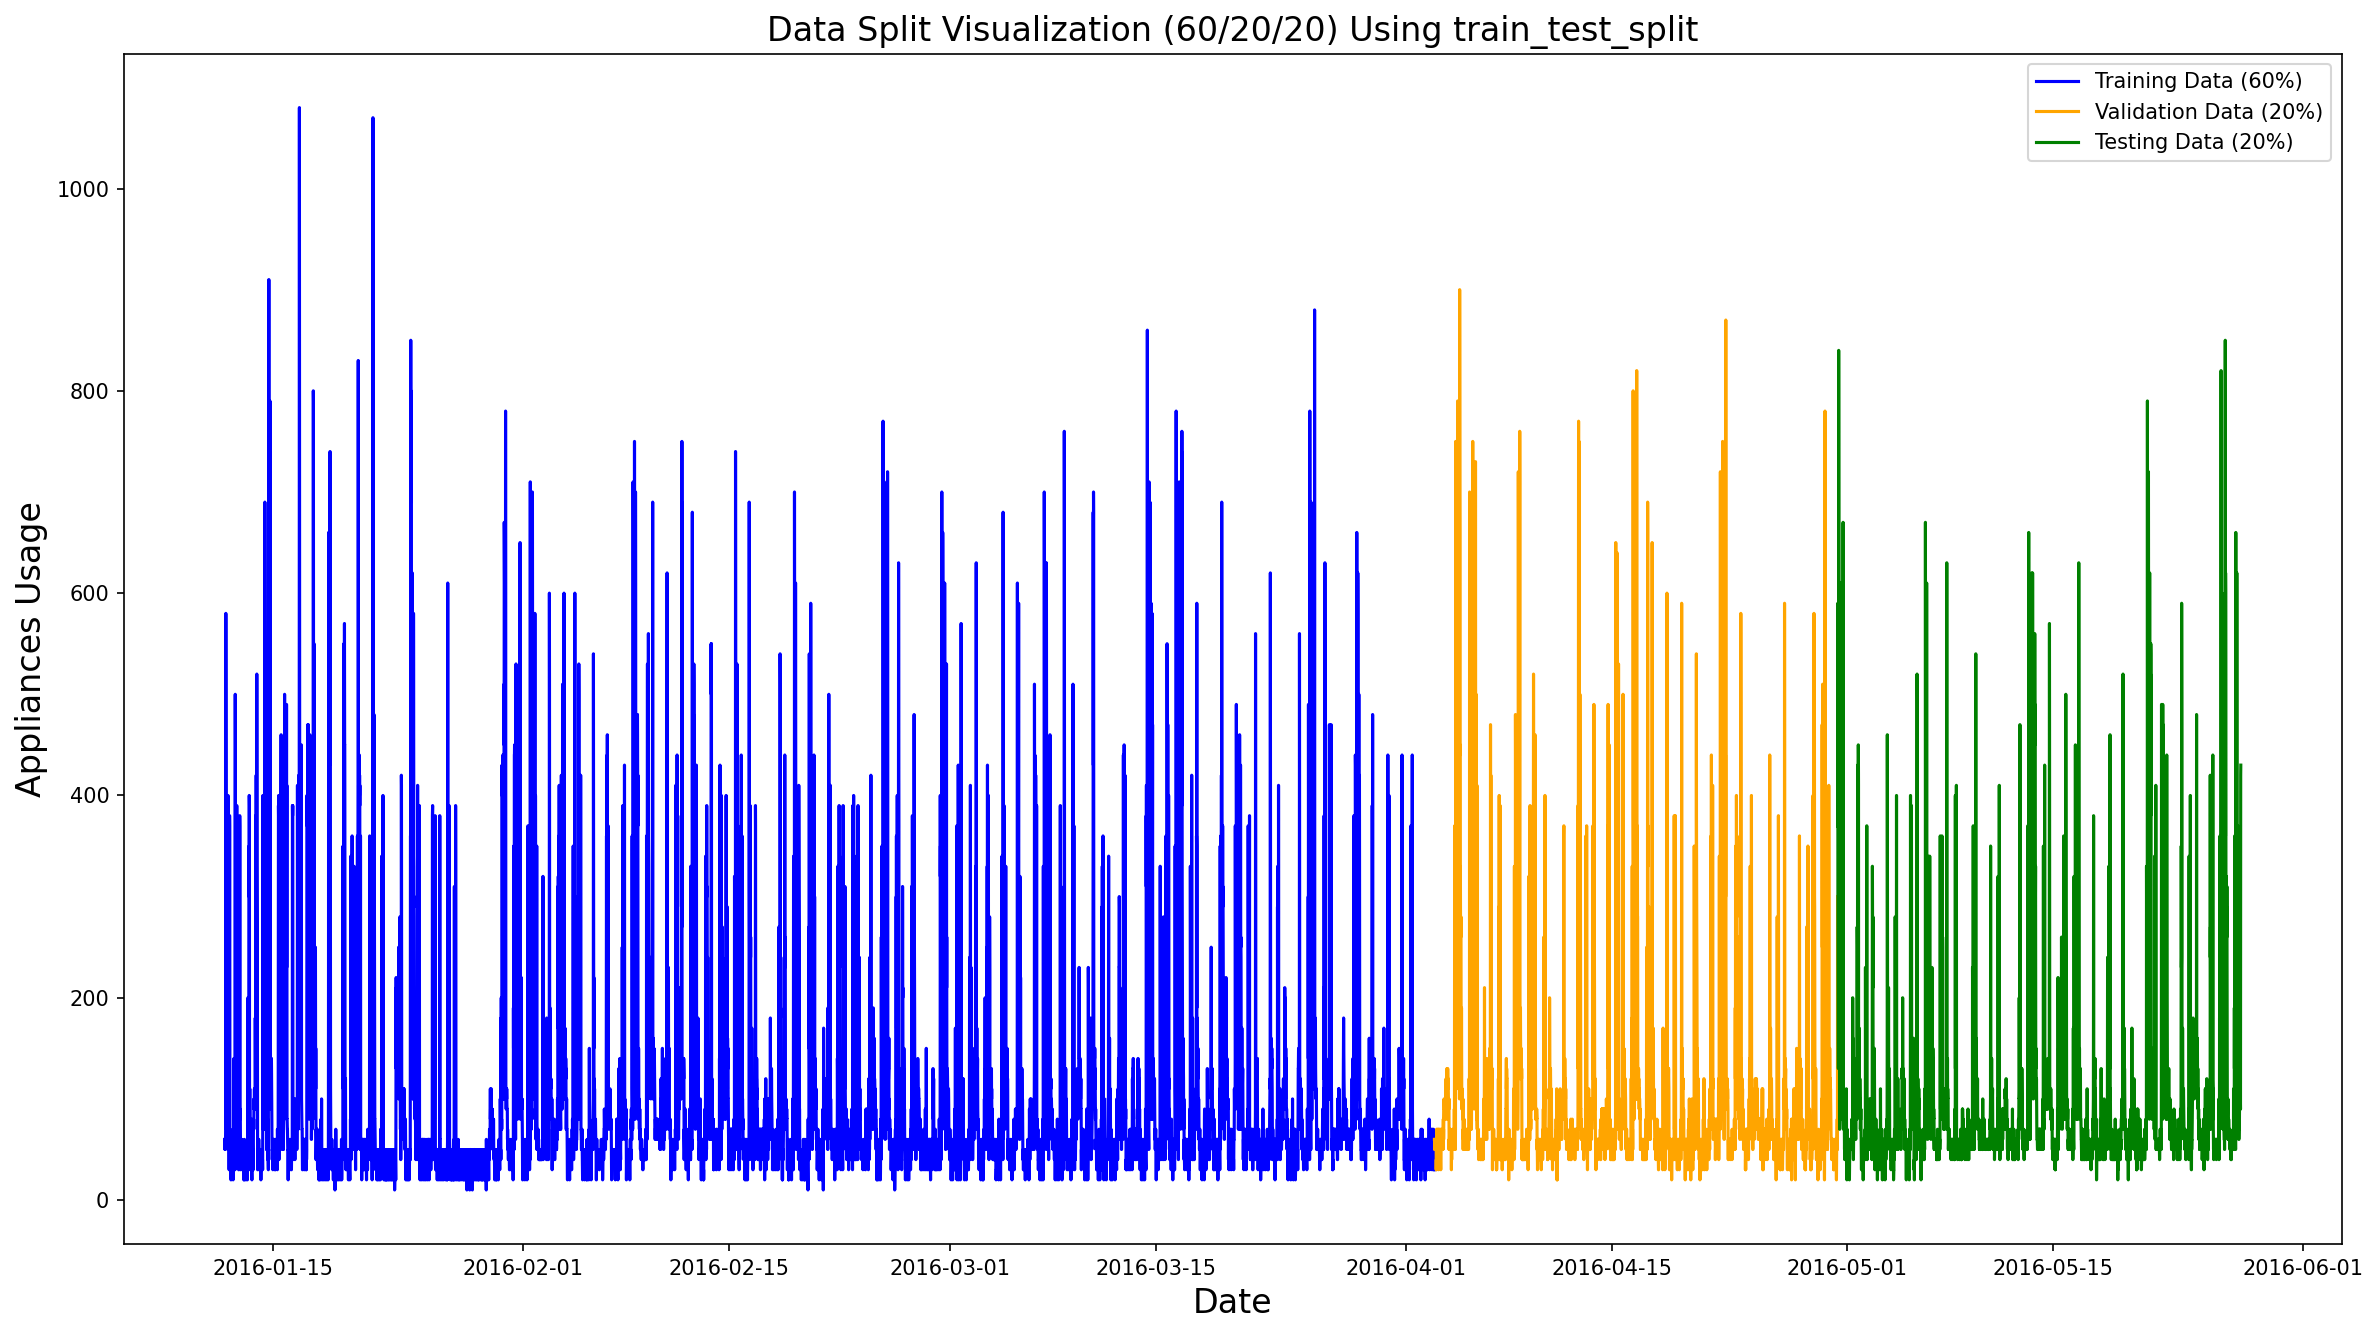

In [113]:
from sklearn.model_selection import train_test_split

# Split the data into 60% train and 40% remaining (val+test)
X_train, temp_data = train_test_split(df, test_size=0.4, shuffle=False, random_state=42)

# Split the remaining 40% into 20% validation and 20% test
X_val, X_test = train_test_split(temp_data, test_size=0.5, shuffle=False, random_state=42)

plt.figure(figsize=(16, 9), dpi=150)
plt.plot(X_train.index, X_train['Appliances'], label='Training Data (60%)', color='blue')
plt.plot(X_val.index, X_val['Appliances'], label='Validation Data (20%)', color='orange')
plt.plot(X_test.index, X_test['Appliances'], label='Testing Data (20%)', color='green')
plt.title('Data Split Visualization (60/20/20) Using train_test_split', fontsize=16)
plt.xlabel('Date', fontsize=16)  # Increased font size for x-axis
plt.ylabel('Appliances Usage', fontsize=16)  # Increased font size for y-axis
plt.legend()
plt.tight_layout()
plt.savefig('eda_data/split_data_visualization.png')

plt.show()

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessor = StandardScaler()
clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train = clf.fit_transform(X_train)
X_val = clf.transform(X_val)
X_test = clf.transform(X_test)


feature_names = clf.get_feature_names_out()

print(feature_names)

['Appliances' 'lights' 'T1' 'RH_1' 'T2' 'RH_2' 'T3' 'RH_3' 'T4' 'RH_4'
 'T5' 'RH_5' 'T6' 'RH_6' 'T7' 'RH_7' 'T8' 'RH_8' 'T9' 'RH_9' 'T_out'
 'Press_mm_hg' 'RH_out' 'Windspeed' 'Visibility' 'Tdewpoint' 'rv1' 'rv2'
 'Appliances_Lag_10min' 'Appliances_Lag_30min' 'Appliances_Lag_1hour']
